# Some introduction to entropy

**`Entropy`** (or **`expected surprisal`**) is a measure of either information given by probability or of the chaos present in a system (more or less: *how much of my data is easy to classify ?*).

In the context of `machine learning`, `entropy` is a characteristic of our dataset. The **more entropy**, the **better suited the data is for learning**, the **less entropy**, the more uniform and pure the data is, as such, learning classification on that dataset **will be very prone to overfitting** (learning will lead to a model that will be very good on our learning data, but will fail on `validation` and/or `testing` data -> it will be a model that is specific to some set of data, and not `generalized` and `usable in other contexts`).


### Libraries

In [1]:
import math
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#print(plt.style.available)

### Utils functions

In [3]:
%%latex
Entropy formula
\begin{align}
  H(X) = -\sum_{x}{p(x) * log_2\,{p(x)}}
\end{align}

<IPython.core.display.Latex object>

In [4]:
def entropy(p_x):
    h_sum = float()
    for item in p_x:
        h_sum += item * math.log(item,2)
    return -h_sum

### Entropy vs probability

In the example below, we compare probability of some random variable X and the entropy of that variable.

Lenght of x samples: 100


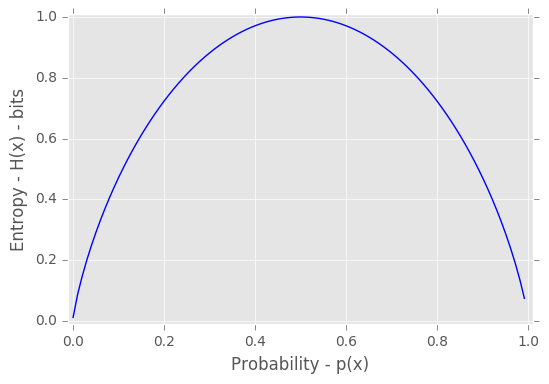

Wall time: 327 ms


In [5]:
%%time

x_r = np.arange(0.001, 0.999, 0.01)
print("Lenght of x samples: %i" % len(x_r))
# starting from 0.001 because log_2(0) not defined
# eg: math.log(0,2) will yield "ValueError: math domain error"

#y_r = []
#for x in x_r:
#    args = [x, 1.0-x]
#    y_r.append(entropy(args))
# <=>
y_r = list(map(lambda x: entropy([x, 1.0-x]), x_r))

plt.plot(x_r, y_r, c='b')
plt.xlabel('Probability - p(x)') #Pr(X=1) ?
plt.ylabel('Entropy - H(x) - bits') #p(x)

plot_margin = 0.01
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))
plt.show()

What can be seen in this graph is that we get the most **bits of information** when our sets are relatively equal divided (equal probability of encountering either of the classes).

**`Why is that ?`**   
Because **when we have the biggest entropy** (approaching 1), we have the **most chaos/impurity in our data**, then we **gain the most information in a random experiment** when we have the **least assurance of predicting which class** will be randomly selected next.  
(alternatively, that assurance will be much higher if we know there is only **`10% chance`** of encountering one class versus **`90% chance`** of another).


### An example, based on [this course notes](https://homes.cs.washington.edu/~shapiro/EE596/notes/InfoGain.pdf)

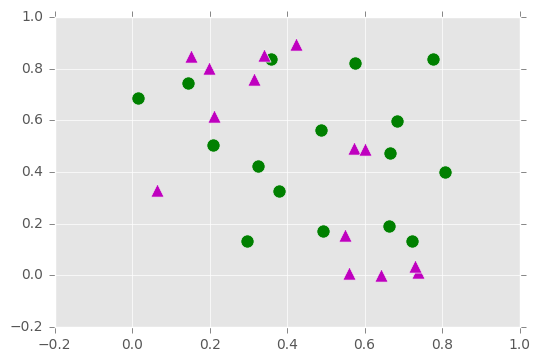

Wall time: 302 ms


In [6]:
%%time

N = 30
N1 = 16
N2 = 14

x1 = 0.9*np.random.rand(N1)
y1 = 0.9*np.random.rand(N1)
#print(np.shape(x1))

x2 = 0.9*np.random.rand(N2)
y2 = 0.9*np.random.rand(N2)
#print(np.shape(x2))

plt.scatter(x1, y1, s=90, marker='o', c='g')
plt.scatter(x2, y2, s=90, marker='^', c='m')

plt.show()

In [7]:
# The only thing valuable of the above are how many members each class has
# in this case, fairly equal

#p_x = [16/30, 14/30]
p_x = [N1/N, N2/N]
print("Entropy result: %s" % entropy(p_x))

Entropy result: 0.9967916319816366
